In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

Basic Modules

In [2]:
import os
import numpy as np
import pandas as pd
import cv2
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
from tensorflow import keras

Importing modules for Alex net

In [3]:
from keras.models  import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [4]:
tf.test.gpu_device_name()

''

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Loading and Extracting Data

In [6]:
BASE_PATH = '/content'

def extract_dataset(path):
  #Extracting the dataset from the zip file

  zip_ref = zipfile.ZipFile(path, 'r')
  zip_ref.extractall(BASE_PATH)
  zip_ref.close()

In [8]:
extract_dataset('/content/drive/My Drive/Research_Dataset/normalize.zip')

In [9]:
os.listdir('/content/normalize')

['lung_n', 'lung_aca', 'lung_scc']

In [10]:
dir_class = [dirs for dirs in os.listdir('/content/normalize')]

In [11]:
dir_class

['lung_n', 'lung_aca', 'lung_scc']

In [12]:
directories = ['Train', 'Test','Validation']
directories

['Train', 'Test', 'Validation']

In [13]:
def make_dirs(dir_lst):
  for j in range(len(directories)):
    if not(os.path.exists(directories[j])):
      os.mkdir(directories[j])
      for i in range(len(dir_class)):
        if not(os.path.exists(directories[j]+'/'+dir_class[i])):
          os.mkdir(directories[j]+'/'+dir_class[i])
        else:
          print('Sub directory exists')
    else:
      print('Directory exist')

In [14]:
make_dirs(directories)

In [15]:
path ='/content/normalize/'

In [16]:
for i in range(len(dir_class)):
  if dir_class[i] == 'lung_n':
    lung_n_lst = [imgs for imgs in os.listdir(path+dir_class[i])]
    print(len(os.listdir(path+dir_class[i])))
  elif dir_class[i] == 'lung_aca':
    lung_aca_lst = [imgs for imgs in os.listdir(path+dir_class[i])]
    print(len(os.listdir(path+dir_class[i])))
  else:
    lung_scc_lst = [imgs for imgs in os.listdir(path+dir_class[i])]
    print(len(os.listdir(path+dir_class[i])))
  

4998
5000
5000


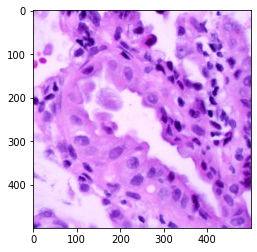

In [21]:
img_aca = cv2.cvtColor(cv2.imread(path+'lung_aca/'+lung_aca_lst[1000]),cv2.COLOR_BGR2RGB)
plt.imshow(img_aca)

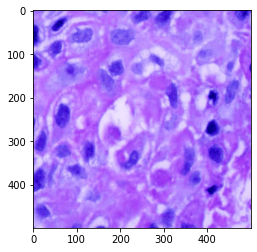

In [22]:
img_scc = cv2.cvtColor(cv2.imread(path+'lung_scc/'+lung_scc_lst[30]),cv2.COLOR_BGR2RGB)
plt.imshow(img_scc)

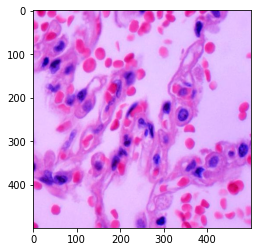

In [23]:
img_n = cv2.cvtColor(cv2.imread(path+'lung_n/'+lung_n_lst[30]),cv2.COLOR_BGR2RGB)
plt.imshow(img_n)

In [24]:
train_split = 0.70
val_split = 0.20


In [26]:
def splitter(path,dirs,lst_img):
  random.seed(123)
  train_indx = int(len(lst_img)*train_split)
  train_lst = random.sample(lst_img,train_indx)
  #print(train_lst)
  #print(len(train_lst))

  val_indx = int(lst_train*val_split)
  val_lst = random.sample(train_lst,val_indx)

  
  #Moving to Validation Folder
  print(len(val_lst))
  #print(val_lst)
  for f in val_lst:
    shutil.move(path+dirs+'/'+f,'Validation/'+dirs)

  #Moving to Training Folder
  train_lst = list(set(train_lst) - set(val_lst))
  #print(train_lst)
  print(len(train_lst))
  for f in train_lst:
    shutil.move(path+dirs+'/'+f,'Train/'+dirs)
  

In [ ]:
def train_val_set_split(type_list):
  for a in tqdm_notebook(type_list):
    if a == 'lung_aca':
      print('lung_aca')
      splitter(path,a,lung_aca_lst)
    elif a == 'lung_scc':
      print('lung_scc')
      splitter(path,a,lung_scc_lst)
    else:
      print('lung_n')
      splitter(path,a,lung_n_lst)


In [ ]:
train_val_set_split(dir_class)

In [ ]:
def fileTransfer(path,dirs):
  for f in tqdm_notebook(os.listdir(path+dirs)):
    shutil.move(path+dirs+'/'+f,'Test/'+dirs)

In [ ]:
def test_set(dir_lst):
  for dirs in dir_lst:
    if dirs =='lung_aca':
      print('lung_aca')
      fileTransfer(path,'lung_aca')
    elif dirs =='lung_scc':
      print('lung_scc')
      fileTransfer(path,'lung_scc')
    else:
      print('lung_n')
      fileTransfer(path,'lung_n')

In [ ]:
test_set(dir_class)